Nama: Isa Aulia Almadani <br>
Dom: Sukoharjo

# Proyek_Klasifikasi_Image_from_GDSC_by Isa Aulia Almadani

## Project Overview: 	Klasifikasi Gambar Butir Padi Menggunakan Mobile Net V2
Proyek ini berfokus pada klasifikasi gambar butir padi menggunakan arsitektur model Mobile Net V2 yang telah dilatih sebelumnya. Mobile Net V2 dipilih karena efisiensi dan performanya yang baik dalam tugas-tugas klasifikasi gambar pada perangkat dengan keterbatasan sumber daya.

## Tujuan Proyek
Tujuan dari proyek ini adalah untuk mengembangkan model yang mampu mengklasifikasikan gambar butir padi dengan akurasi tinggi. Model ini diharapkan dapat membantu dalam proses seleksi dan pengawasan kualitas butir padi secara otomatis.

## Fitur Utama
* Import Library
Mengimpor pustaka-pustaka yang diperlukan untuk pemrosesan data, pelatihan model, dan visualisasi hasil.
* Import Dataset from Kaggle
Mengunduh dan memuat dataset gambar butir padi dari Kaggle untuk digunakan dalam pelatihan dan pengujian model.
* Preprocessing
Melakukan praproses pada dataset, termasuk perubahan ukuran gambar, normalisasi, dan augmentasi data untuk meningkatkan kinerja model.
* Building Model with Pretrained Model
Menggunakan Mobile Net V2 yang telah dilatih sebelumnya sebagai dasar untuk membangun model klasifikasi. Langkah ini melibatkan fine-tuning model untuk menyesuaikan dengan dataset butir padi.
* Plot Visualization
Membuat visualisasi data dan hasil pelatihan model, termasuk grafik akurasi dan kehilangan (loss) selama proses pelatihan.
* Predict Image
Menggunakan model yang telah dilatih untuk memprediksi kelas dari gambar butir padi baru, dan menampilkan hasil prediksi tersebut.
## Teknologi yang Digunakan
* Python: Bahasa pemrograman utama yang digunakan dalam proyek ini.
* TensorFlow/Keras: Framework deep learning yang digunakan untuk membangun dan melatih model.
* Kaggle: Sumber dataset gambar butir padi.
* Matplotlib/Seaborn: Pustaka visualisasi yang digunakan untuk membuat plot dan grafik.
## Rencana Pengembangan
* Mengoptimalkan model dengan teknik-teknik tambahan seperti fine-tuning dan hyperparameter tuning.
* Menerapkan teknik augmentasi data yang lebih lanjut untuk meningkatkan kinerja model.
* Mengintegrasikan model dengan aplikasi berbasis web untuk demo prediksi gambar secara real-time.
## Hasil yang Diharapkan
* Menghasilkan model klasifikasi gambar butir padi dengan akurasi tinggi.
* Memudahkan proses seleksi dan pengawasan kualitas butir padi melalui otomatisasi.
* Memberikan kontribusi terhadap pengembangan teknologi pertanian berbasis AI di Indonesia.


# Manage file import from kaggle

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"almadzzz","key":"ba12525d1a739eae3dac7ba3e4a53952"}'}

In [ ]:

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s ' rice dataset'

ref                                                    title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/rice-image-dataset                   Rice Image Dataset                            219MB  2022-04-03 02:12:00          14653       1764  0.875            
muratkokludataset/rice-dataset-commeo-and-osmancik     Rice Dataset Commeo and Osmancik              524KB  2022-04-03 00:40:03           1146       1421  0.9375           
muratkokludataset/rice-msc-dataset                     Rice MSC Dataset                              102MB  2022-04-03 01:33:52           1276       1444  0.9375           
vbookshelf/rice-leaf-diseases                          Rice Leaf Diseases Dataset                     37MB  2020-02-21 01:35:02        

In [ ]:
!kaggle datasets download -d 'muratkokludataset/rice-image-dataset    '

 98% 216M/219M [00:01<00:00, 167MB/s]
100% 219M/219M [00:01<00:00, 134MB/s]


# Prepare Dataset

# Import Library

In [ ]:
import os
import json
import zipfile


# from keras.layers import Input
from keras.applications import EfficientNetB7, MobileNetV2, EfficientNetV2M

import tensorflow as tf
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Conv2D, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
filezip = "rice-image-dataset    .zip"
extractZip = zipfile.ZipFile(filezip, 'r')
extractZip.extractall("datasets")

In [ ]:
os.listdir("/content/datasets/Rice_Image_Dataset")

['Rice_Citation_Request.txt',
 'Jasmine',
 'Karacadag',
 'Ipsala',
 'Basmati',
 'Arborio']

In [ ]:

dataset_path = '/content/datasets/Rice_Image_Dataset'
class_samples = {}

# Loop melalui setiap kelas di dalam folder dataset
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    if os.path.isdir(class_path):
        num_class = len([file for file in os.listdir(class_path) if file.endswith('.jpg')])

        class_samples[class_folder] = num_class

        # Loop melalui setiap file di dalam kelas
        for dirname, _, filenames in os.walk(class_path):
            for filename in filenames:
                file_path = os.path.join(dirname, filename)
                print(file_path)

for class_name, num_class in class_samples.items():
    print(f"Kelas '{class_name}': {num_class} images")

Streaming output truncated to the last 5000 lines.
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (4643).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (9692).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (3741).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (1168).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (1812).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (4867).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (3758).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (13207).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (8483).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (7838).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (8613).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (12614).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (9600).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (38).jpg
/content/datasets/Rice_Image_Dataset/Ipsala/Ipsala (4597).jpg
/content/datasets/R

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (4592).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (3174).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (10492).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (2384).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (14454).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (11370).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (14815).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (8935).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (4403).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (6477).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (3541).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (1093).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (13832).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arborio (475).jpg
/content/datasets/Rice_Image_Dataset/Arborio/Arbo

# Preprocessing

In [ ]:
dataset_dir = "/content/datasets/Rice_Image_Dataset"


In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)
train_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=64,
    shuffle = True,
    color_mode = 'rgb',
    class_mode="categorical",
    subset="training"
)

validation_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=64,
    shuffle = True,
    color_mode = 'rgb',
    class_mode="categorical",
    subset="validation"
)



Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


#Building model

In [ ]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_shape=(224, 224, 3))

pre_trained_model.trainable = False

model = Sequential([
    pre_trained_model,
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    # Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0,1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(5, activation='softmax')
])

learning_rate = 0.001
optimizer = 'adam'
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          368672    
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                           

In [ ]:
# checkpoint = ModelCheckpoint(
#     "best_model.h5",
#     monitor="val_accuracy",
#     save_best_only=True,
#     mode="max",
#     verbose=2
# )
reduce_lr = ReduceLROnPlateau(monitor= 'val_accuracy', factor=0.3, patience=2, min_delta=0.001)

optimizer = 'adam'
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)


In [ ]:

class stopCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if self.has_reached_accuracy(logs):
            print(' Stop training model, acc & val_acc > 92% ')
            self.model.stop_training = True

    def has_reached_accuracy(self, logs):
        return (logs.get('accuracy') > 0.92  and  logs.get('val_accuracy') > 0.92)

callbacks = stopCallBack()

history = model.fit(train_generator,
              epochs=32,
              steps_per_epoch = 19,
              validation_data=validation_generator,
              callbacks = [callbacks, reduce_lr],
              )


Epoch 1/32
19/19 [==============================] - 231s 12s/step - loss: 1.4520 - accuracy: 0.4581 - val_loss: 0.8805 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 2/32
19/19 [==============================] - 215s 12s/step - loss: 0.6620 - accuracy: 0.7467 - val_loss: 0.2668 - val_accuracy: 0.9071 - lr: 0.0010
Epoch 3/32
19/19 [==============================] - 218s 12s/step - loss: 0.4000 - accuracy: 0.8594 - val_loss: 0.2545 - val_accuracy: 0.9153 - lr: 0.0010
Epoch 4/32
19/19 [==============================] - 212s 12s/step - loss: 0.2802 - accuracy: 0.9079 - val_loss: 0.2187 - val_accuracy: 0.9285 - lr: 0.0010
Epoch 5/32
19/19 [==============================] - 213s 12s/step - loss: 0.2391 - accuracy: 0.9202 - val_loss: 0.1483 - val_accuracy: 0.9502 - lr: 0.0010


# Plot Visualization

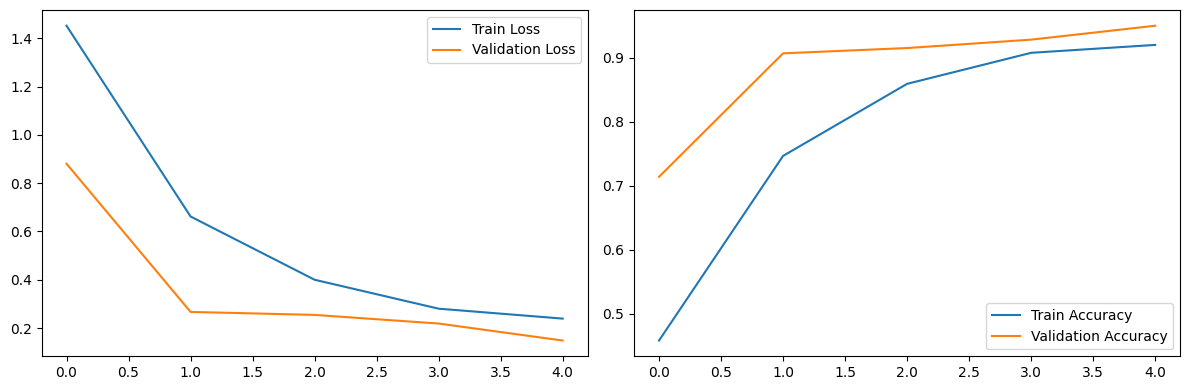

In [ ]:

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predict Image


Saving Karacadag (10000).jpg to Karacadag (10000).jpg
1/1 [==============================] - 0s 24ms/step
Karacadag (10000).jpg
[0.02432952 0.01136964 0.05485887 0.01845919 0.89098275]
4


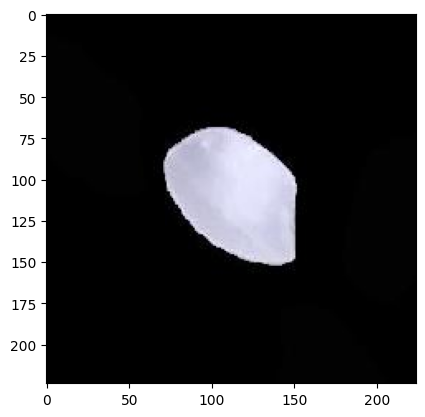

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

train_generator.class_indices
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224, 224 ))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    output_class = np.argmax(classes)
    print(fn)
    print(classes[0])
    print(output_class)


In [ ]:
train_generator.class_indices
print(train_generator.class_indices)


{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [ ]:
if output_class == 0:
    print('Arborio')
elif output_class == 1:
    print('Basmati')
elif output_class == 2:
    print('Ipsala')
elif output_class == 3:
    print('Jasmine')
else:
    print('Karacadag')



Karacadag


In [ ]:
tflite_model_name = "best_model.tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
save_model_format = converter.convert()

with open(tflite_model_name, 'wb') as f:
    f.write(save_model_format)